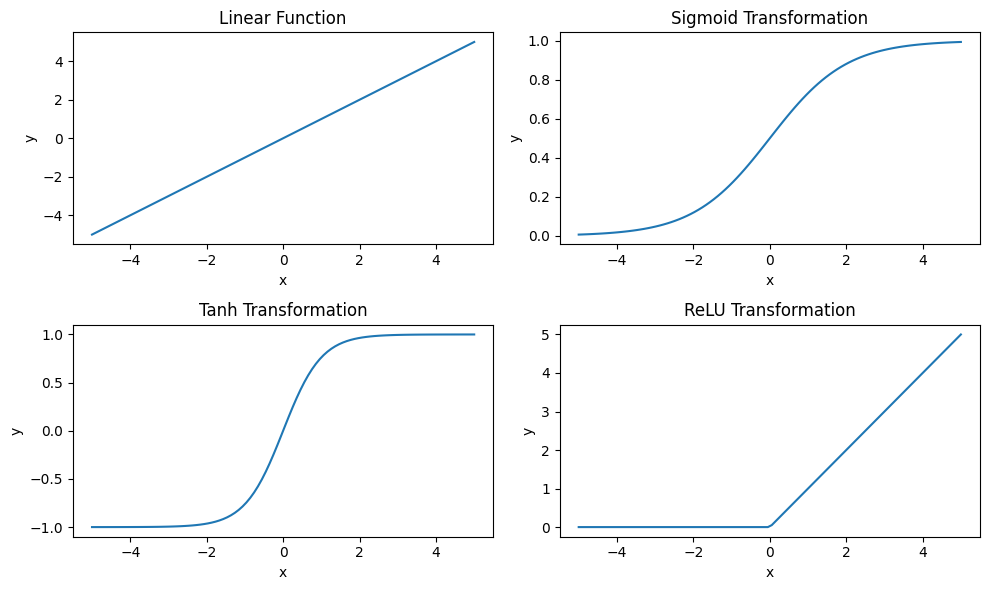

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear function
def linear_function(x, m, b):
    return m * x + b

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Parameters for the linear function
m = 1
b = 0

# Generate the input data
x = np.linspace(-5, 5, 100)

# Compute the linear function
y_linear = linear_function(x, m, b)

# Compute the non-linear transformations
y_sigmoid = sigmoid(y_linear)
y_tanh = tanh(y_linear)
y_relu = relu(y_linear)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(x, y_linear)
plt.title('Linear Function')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2, 2, 2)
plt.plot(x, y_sigmoid)
plt.title('Sigmoid Transformation')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2, 2, 3)
plt.plot(x, y_tanh)
plt.title('Tanh Transformation')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2, 2, 4)
plt.plot(x, y_relu)
plt.title('ReLU Transformation')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, initialization='xavier'):
        """
        Initialize the neural network with given sizes and weight initialization method.

        Parameters:
        input_size (int): Number of input features.
        hidden_size (int): Number of neurons in the hidden layer.
        output_size (int): Number of output neurons.
        initialization (str): Method for weight initialization ('xavier', 'he', or 'random').
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights
        self.W1, self.b1 = self._initialize_weights(input_size, hidden_size, initialization)
        self.W2, self.b2 = self._initialize_weights(hidden_size, output_size, initialization)

    def _initialize_weights(self, input_size, output_size, initialization):
        """
        Initialize weights and biases using the specified method.

        Parameters:
        input_size (int): Number of input features.
        output_size (int): Number of output features.
        initialization (str): Method for weight initialization ('xavier', 'he', or 'random').

        Returns:
        tuple: Initialized weights and biases.
        """
        if initialization == 'xavier':
            low = -np.sqrt(6 / (input_size + output_size))
            high = np.sqrt(6 / (input_size + output_size))
            W = np.random.uniform(low, high, (input_size, output_size))
            b = np.zeros(output_size)
        elif initialization == 'he':
            std = np.sqrt(2 / input_size)
            W = np.random.normal(0, std, (input_size, output_size))
            b = np.zeros(output_size)
        else:
            W = np.random.rand(input_size, output_size)
            b = np.random.rand(output_size)
        return W, b

    def sigmoid(self, x):
        """
        Sigmoid activation function.

        Parameters:
        x (numpy.ndarray): Input array.

        Returns:
        numpy.ndarray: Output after applying sigmoid function.
        """
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        Derivative of the sigmoid function.

        Parameters:
        x (numpy.ndarray): Input array.

        Returns:
        numpy.ndarray: Output after applying derivative of sigmoid function.
        """
        return x * (1 - x)

    def mse_loss(self, y_true, y_pred):
        """
        Mean squared error loss function.

        Parameters:
        y_true (numpy.ndarray): True labels.
        y_pred (numpy.ndarray): Predicted labels.

        Returns:
        float: Mean squared error loss.
        """
        return np.mean((y_true - y_pred) ** 2)

    def forward(self, X):
        """
        Perform forward propagation.

        Parameters:
        X (numpy.ndarray): Input data.

        Returns:
        numpy.ndarray: Output of the network.
        """
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y):
        """
        Perform backward propagation.

        Parameters:
        X (numpy.ndarray): Input data.
        y (numpy.ndarray): True labels.

        Returns:
        tuple: Gradients for weights and biases.
        """
        d_loss_a2 = 2 * (self.a2 - y) / y.size
        d_a2_z2 = self.sigmoid_derivative(self.a2)
        d_z2_W2 = self.a1
        d_z2_a1 = self.W2
        d_a1_z1 = self.sigmoid_derivative(self.a1)
        d_z1_W1 = X

        d_z2 = d_loss_a2 * d_a2_z2
        d_W2 = np.dot(d_z2_W2.T, d_z2)
        d_b2 = np.sum(d_z2, axis=0)
        d_a1 = np.dot(d_z2.T, self.W2).T  # Corrected line
        d_z1 = d_a1 * d_a1_z1
        d_W1 = np.dot(d_z1_W1.T, d_z1)
        d_b1 = np.sum(d_z1, axis=0)

        return d_W1, d_b1, d_W2, d_b2

    def update_weights(self, d_W1, d_b1, d_W2, d_b2, learning_rate):
        """
        Update weights and biases using the calculated gradients.

        Parameters:
        d_W1 (numpy.ndarray): Gradient of weights for the first layer.
        d_b1 (numpy.ndarray): Gradient of biases for the first layer.
        d_W2 (numpy.ndarray): Gradient of weights for the second layer.
        d_b2 (numpy.ndarray): Gradient of biases for the second layer.
        learning_rate (float): Learning rate for weight updates.
        """
        self.W1 -= learning_rate * d_W1
        self.b1 -= learning_rate * d_b1
        self.W2 -= learning_rate * d_W2
        self.b2 -= learning_rate * d_b2

    def train(self, X, y, epochs, learning_rate, batch_size=32, early_stopping=False, patience=10):
        """
        Train the neural network using mini-batch gradient descent.

        Parameters:
        X (numpy.ndarray): Input data.
        y (numpy.ndarray): True labels.
        epochs (int): Number of training epochs.
        learning_rate (float): Learning rate for weight updates.
        batch_size (int): Size of mini-batches for training.
        early_stopping (bool): Whether to use early stopping.
        patience (int): Number of epochs to wait for improvement before stopping.

        Returns:
        list: Loss values over epochs.
        """
        losses = []
        best_loss = np.inf
        patience_counter = 0

        for epoch in range(epochs):
            batch_indices = np.random.permutation(len(X))
            for i in range(0, len(X), batch_size):
                batch_indices_i = batch_indices[i:i + batch_size]
                X_batch = X[batch_indices_i]
                y_batch = y[batch_indices_i]

                y_pred = self.forward(X_batch)
                loss = self.mse_loss(y_batch, y_pred)
                losses.append(loss)

                d_W1, d_b1, d_W2, d_b2 = self.backward(X_batch, y_batch)
                self.update_weights(d_W1, d_b1, d_W2, d_b2, learning_rate)

            if early_stopping:
                if loss < best_loss:
                    best_loss = loss
                    patience_counter = 0
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        print(f"Early stopping at epoch {epoch}")
                        break

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
                plot_weights_and_activations(self, epoch)

        return losses

    def predict(self, X):
        """
        Make predictions using the trained neural network.

        Parameters:
        X (numpy.ndarray): Input data.

        Returns:
        numpy.ndarray: Predicted labels.
        """
        y_pred = self.forward(X)
        return y_pred > 0.5

def plot_decision_boundary(X, y, model):
    """
    Plot the decision boundary of the trained model.

    Parameters:
    X (numpy.ndarray): Input data.
    y (numpy.ndarray): True labels.
    model (SimpleNeuralNetwork): Trained neural network model.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

def plot_weights_and_activations(nn, epoch):
    """
    Plot the weights and activations of the neural network.

    Parameters:
    nn (SimpleNeuralNetwork): Trained neural network model.
    epoch (int): Current epoch number.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(nn.W1, aspect='auto', cmap='viridis')
    axes[0].set_title(f'Weights W1 at Epoch {epoch}')
    axes[0].set_xlabel('Hidden Neurons')
    axes[0].set_ylabel('Input Features')

    axes[1].imshow(nn.a1.T, aspect='auto', cmap='viridis')
    axes[1].set_title(f'Activations a1 at Epoch {epoch}')
    axes[1].set_xlabel('Samples')
    axes[1].set_ylabel('Hidden Neurons')
    plt.tight_layout()
    plt.show()

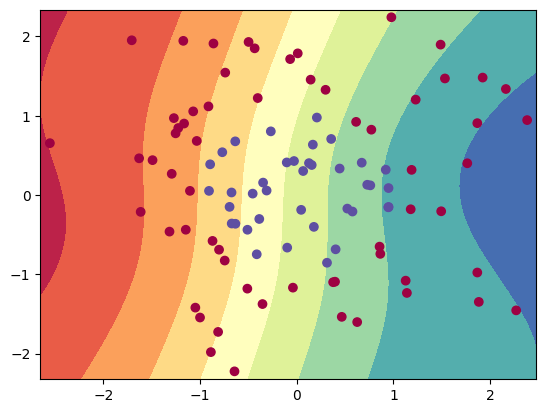

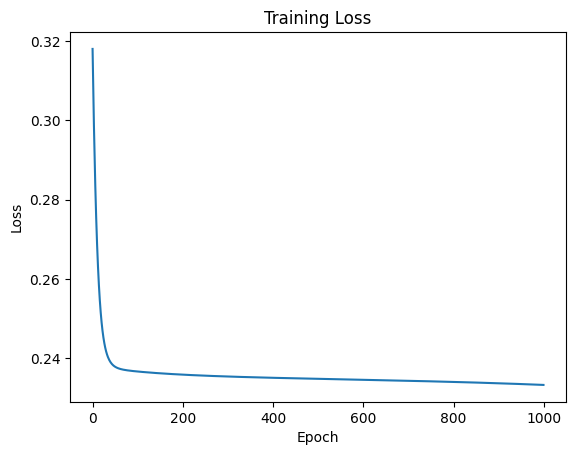

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0) / m
        
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0) / m
        
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for _ in range(epochs):
            output = self.forward(X)
            loss = np.mean((y - output) ** 2)
            losses.append(loss)
            self.backward(X, y, learning_rate)
        return losses

    def predict(self, X):
        return self.forward(X)

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

def plot_losses(losses):
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

# Generate sample data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.array([1 if x1 ** 2 + x2 ** 2 < 1 else 0 for x1, x2 in X])

# Create and train the neural network
nn = SimpleNeuralNetwork(2, 4, 1)
losses = nn.train(X, y.reshape(-1, 1), epochs=1000, learning_rate=0.1)

# Plot the decision boundary
plot_decision_boundary(X, y, nn)

# Plot the training loss
plot_losses(losses)

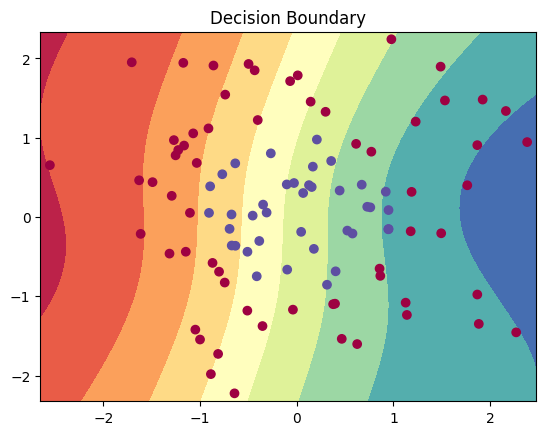

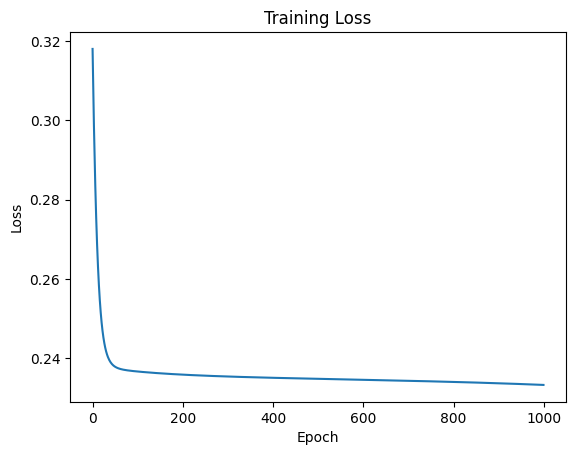

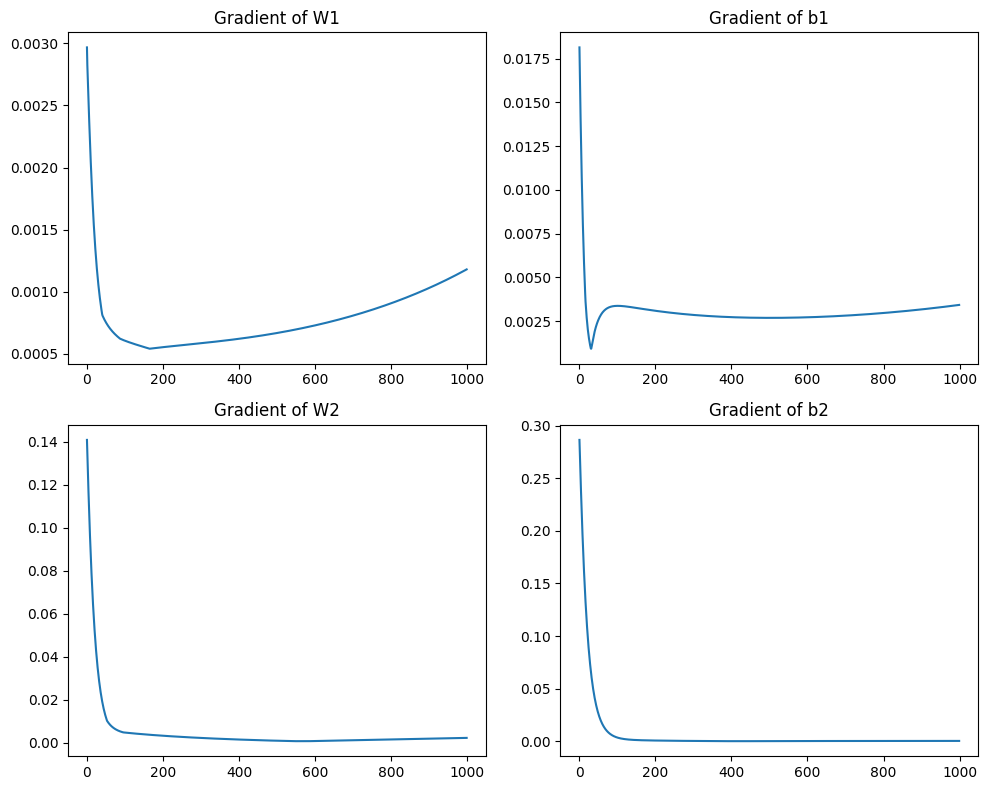

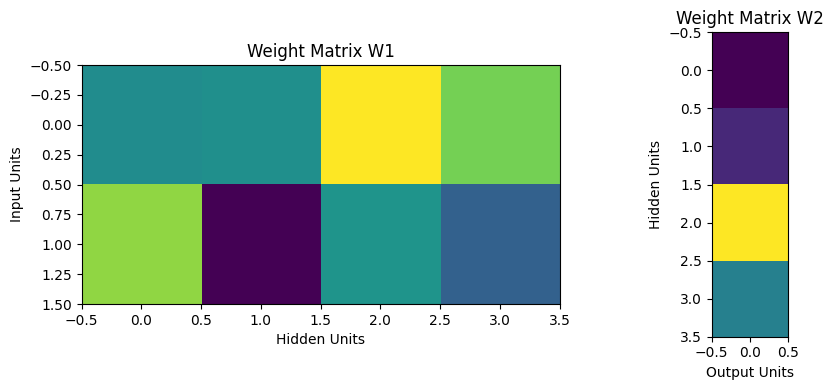

In [19]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0) / m
        
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0) / m
        
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        
        return dW1, db1, dW2, db2

    def train(self, X, y, epochs, learning_rate):
        losses = []
        gradients = []
        for _ in range(epochs):
            output = self.forward(X)
            loss = np.mean((y - output) ** 2)
            losses.append(loss)
            dW1, db1, dW2, db2 = self.backward(X, y, learning_rate)
            gradients.append((dW1, db1, dW2, db2))
        return losses, gradients

    def predict(self, X):
        return self.forward(X)

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()

def plot_losses(losses):
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

def plot_gradients(gradients):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs[0, 0].plot([np.mean(np.abs(dW1)) for dW1, _, _, _ in gradients])
    axs[0, 0].set_title("Gradient of W1")
    axs[0, 1].plot([np.mean(np.abs(db1)) for _, db1, _, _ in gradients])
    axs[0, 1].set_title("Gradient of b1")
    axs[1, 0].plot([np.mean(np.abs(dW2)) for _, _, dW2, _ in gradients])
    axs[1, 0].set_title("Gradient of W2")
    axs[1, 1].plot([np.mean(np.abs(db2)) for _, _, _, db2 in gradients])
    axs[1, 1].set_title("Gradient of b2")
    plt.tight_layout()
    plt.show()

def plot_weight_updates(nn):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(nn.W1, cmap="viridis")
    axs[0].set_title("Weight Matrix W1")
    axs[0].set_xlabel("Hidden Units")
    axs[0].set_ylabel("Input Units")
    axs[1].imshow(nn.W2, cmap="viridis")
    axs[1].set_title("Weight Matrix W2")
    axs[1].set_xlabel("Output Units")
    axs[1].set_ylabel("Hidden Units")
    plt.tight_layout()
    plt.show()

# Generate sample data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.array([1 if x1 ** 2 + x2 ** 2 < 1 else 0 for x1, x2 in X])

# Create and train the neural network
nn = SimpleNeuralNetwork(2, 4, 1)
losses, gradients = nn.train(X, y.reshape(-1, 1), epochs=1000, learning_rate=0.1)

# Plot the decision boundary
plot_decision_boundary(X, y, nn)

# Plot the training loss
plot_losses(losses)

# Plot the gradients
plot_gradients(gradients)

# Plot the weight updates
plot_weight_updates(nn)

Final values at the cut-off point:
Gradient of W1: [[ 0.00940654  0.0065734  -0.00197664  0.00465911]
 [-0.01918074 -0.02171363  0.01523071 -0.01434067]]
Gradient of b1: [ 0.05363753  0.05038826 -0.02884208  0.01642209]
Gradient of W2: [[-0.09569504]
 [-0.09367715]
 [-0.04501885]
 [-0.07078878]]
Gradient of b2: [-0.13305765]
Weights W1: [[-0.34405978  0.26784538 -0.91525459 -0.213005  ]
 [-1.06575965 -0.56671508  0.11376078  0.46980581]]
Biases b1: [-0.86884699 -0.53780315  0.45546392 -0.09513366]
Weights W2: [[-0.69180116]
 [-0.46765254]
 [ 0.37434729]
 [-0.67027307]]
Biases b2: [0.07944473]


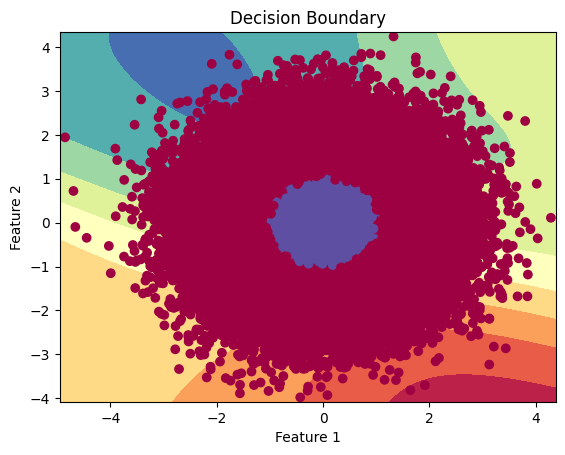

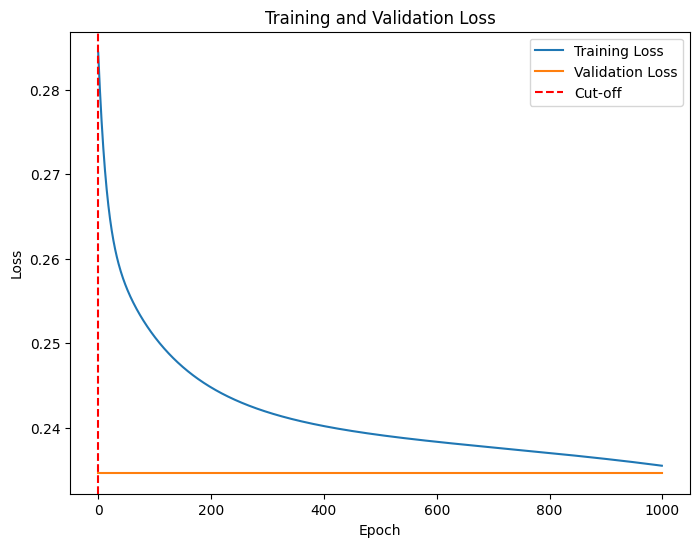

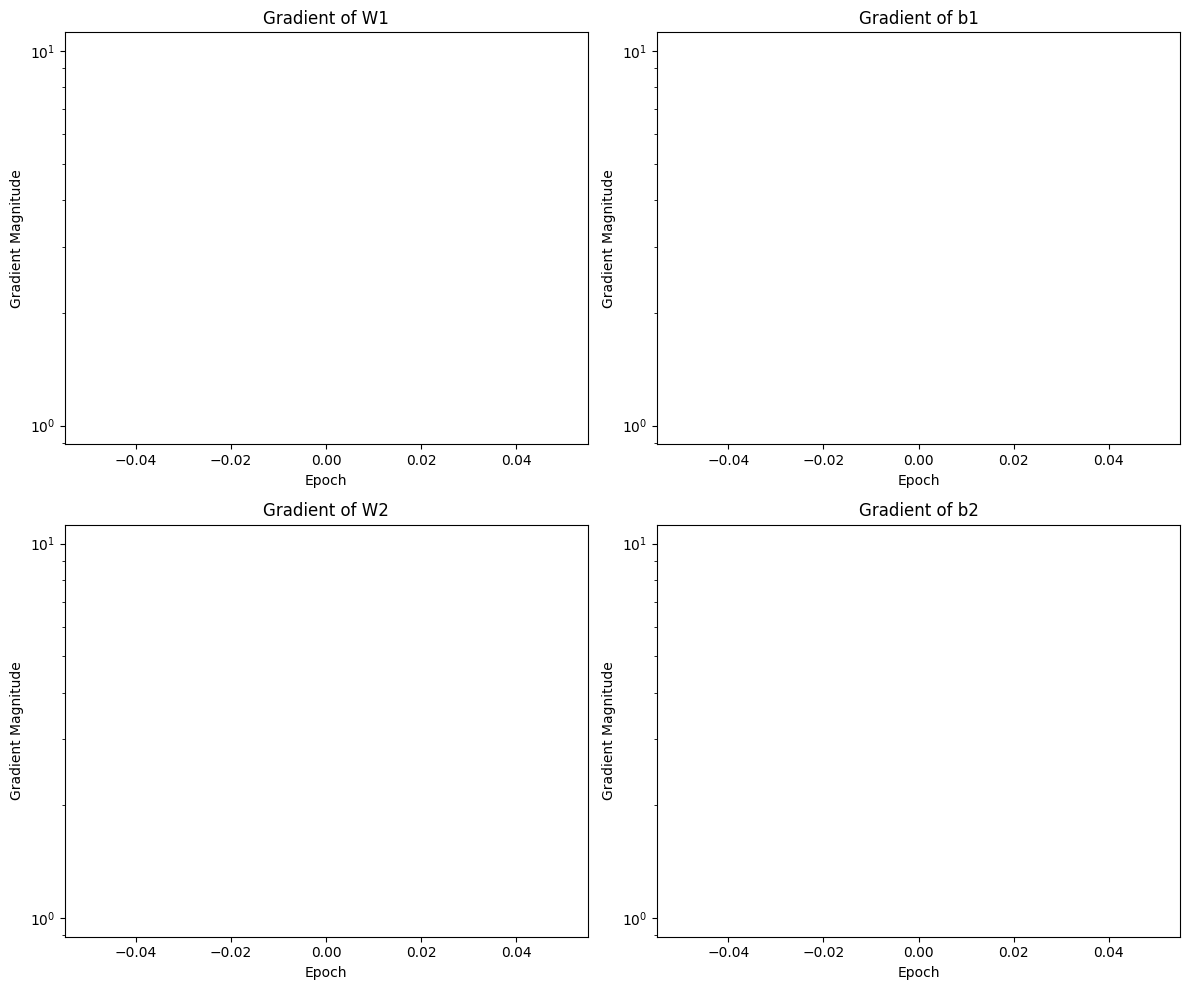

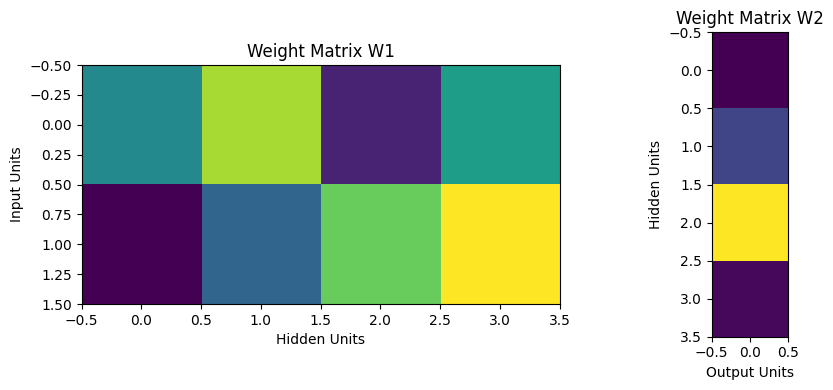

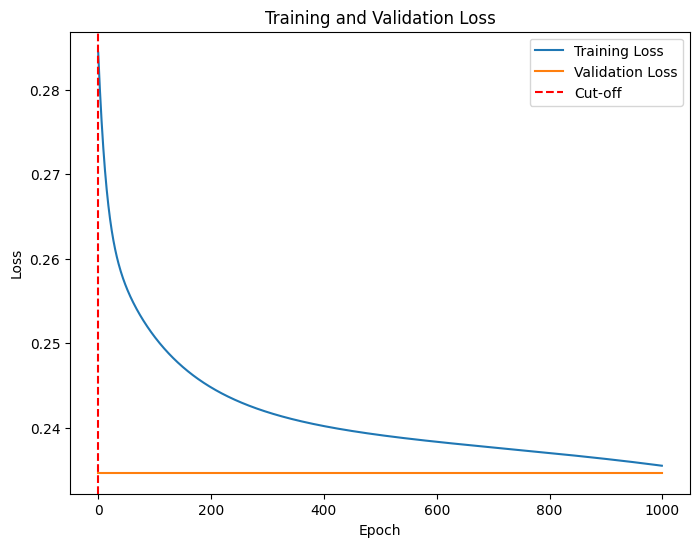

Evaluation Metrics:
Accuracy: 0.6079666666666667


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases randomly
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def sigmoid(self, x):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivative of the sigmoid function
        return x * (1 - x)

    def forward(self, X):
        # Forward pass through the neural network
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        # Backward pass (backpropagation) to compute gradients
        m = X.shape[0]
        
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0) / m
        
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0) / m
        
        # Update weights and biases using gradient descent
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        
        return dW1, db1, dW2, db2

    def train(self, X, y, epochs, learning_rate):
        # Train the neural network for a specified number of epochs
        losses = []
        gradients = []
        for _ in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Compute loss (mean squared error)
            loss = np.mean((y - output) ** 2)
            losses.append(loss)
            
            # Backward pass (backpropagation)
            dW1, db1, dW2, db2 = self.backward(X, y, learning_rate)
            gradients.append((dW1, db1, dW2, db2))
            
        return losses, gradients

    def predict(self, X):
        # Make predictions using the trained model
        return self.forward(X)

def plot_decision_boundary(X, y, model):
    # Plot the decision boundary of the trained model
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    
    # Notes on decision boundary:
    # - The decision boundary separates the two classes (0 and 1) based on the learned weights and biases.
    # - Regions with different colors represent different predicted classes.
    # - The scatter points represent the actual data points, colored based on their true labels.
    # - A well-trained model should have a decision boundary that effectively separates the two classes.

def plot_losses(losses):
    # Plot the training loss over epochs
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()
    
    # Notes on training loss:
    # - The training loss measures the difference between the predicted outputs and the true labels.
    # - A decreasing trend in the loss indicates that the model is learning and improving over epochs.
    # - Convergence to a low loss value suggests that the model has learned to fit the training data well.

def plot_gradients(gradients, cut_off):
    # Plot the gradients of weights and biases over epochs
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plot gradient of W1
    axs[0, 0].plot([np.mean(np.abs(dW1)) for dW1, _, _, _ in gradients[:cut_off]])
    axs[0, 0].set_title("Gradient of W1")
    axs[0, 0].set_xlabel("Epoch")
    axs[0, 0].set_ylabel("Gradient Magnitude")
    axs[0, 0].set_yscale('log')  # Set y-axis to logarithmic scale
    
    # Plot gradient of b1
    axs[0, 1].plot([np.mean(np.abs(db1)) for _, db1, _, _ in gradients[:cut_off]])
    axs[0, 1].set_title("Gradient of b1")
    axs[0, 1].set_xlabel("Epoch")
    axs[0, 1].set_ylabel("Gradient Magnitude")
    axs[0, 1].set_yscale('log')  # Set y-axis to logarithmic scale
    
    # Plot gradient of W2
    axs[1, 0].plot([np.mean(np.abs(dW2)) for _, _, dW2, _ in gradients[:cut_off]])
    axs[1, 0].set_title("Gradient of W2")
    axs[1, 0].set_xlabel("Epoch")
    axs[1, 0].set_ylabel("Gradient Magnitude")
    axs[1, 0].set_yscale('log')  # Set y-axis to logarithmic scale
    
    # Plot gradient of b2
    axs[1, 1].plot([np.mean(np.abs(db2)) for _, _, _, db2 in gradients[:cut_off]])
    axs[1, 1].set_title("Gradient of b2")
    axs[1, 1].set_xlabel("Epoch")
    axs[1, 1].set_ylabel("Gradient Magnitude")
    axs[1, 1].set_yscale('log')  # Set y-axis to logarithmic scale
    
    plt.tight_layout()
    plt.show()
    
    # Notes on gradients and learning rate:
    # - Gradients indicate the direction and magnitude of the update to the weights and biases.
    # - The learning rate determines the step size taken in the direction of the gradients.
    # - Larger learning rates lead to faster convergence but may overshoot the minimum.
    # - Smaller learning rates result in slower convergence but are more precise.
    # - The gradients are plotted up to the cut-off point, representing the optimal values.


def plot_weight_updates(nn):
    # Plot the final values of the weight matrices
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(nn.W1, cmap="viridis")
    axs[0].set_title("Weight Matrix W1")
    axs[0].set_xlabel("Hidden Units")
    axs[0].set_ylabel("Input Units")
    axs[1].imshow(nn.W2, cmap="viridis")
    axs[1].set_title("Weight Matrix W2")
    axs[1].set_xlabel("Output Units")
    axs[1].set_ylabel("Hidden Units")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.axvline(cut_off, color='r', linestyle='--', label='Cut-off')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()
    
    # Notes on loss curve and global minima:
    # - The loss curve shows the progression of training and validation losses over epochs.
    # - The objective is to reach the global minima, where the loss is minimized.
    # - The cut-off point represents the epoch at which the model achieves the best performance.
    # - The cut-off is determined based on the validation loss to prevent overfitting.
    # - At the cut-off point, the model's weights and biases are considered optimal.


def plot_losses(train_losses, val_losses, cut_off):
    # Plot the training and validation losses over epochs
    plt.figure(figsize=(8, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.axvline(cut_off, color='r', linestyle='--', label='Cut-off')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()
    
    # Notes on loss curve and global minima:
    # - The loss curve shows the progression of training and validation losses over epochs.
    # - The objective is to reach the global minima, where the loss is minimized.
    # - The cut-off point represents the epoch at which the model achieves the best performance.
    # - The cut-off is determined based on the validation loss to prevent overfitting.
    # - At the cut-off point, the model's weights and biases are considered optimal.

def evaluate_model(model, X, y):
    # Make predictions using the trained model
    y_pred = model.predict(X)
    
    # Calculate accuracy
    accuracy = np.mean((y_pred > 0.5) == y)
    
    # Print evaluation metrics
    print("Evaluation Metrics:")
    print("Accuracy:", accuracy)


# Generate sample data
np.random.seed(0)
X = np.random.randn(100000, 2)
y = np.array([1 if x1 ** 2 + x2 ** 2 < 1 else 0 for x1, x2 in X])

# Split the data into training and validation sets
train_size = int(0.7 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Create and train the neural network
nn = SimpleNeuralNetwork(2, 4, 1)
train_losses, gradients = nn.train(X_train, y_train.reshape(-1, 1), epochs=1000, learning_rate=0.1)

# Calculate validation losses
val_losses = []
for epoch in range(len(train_losses)):
    nn.forward(X_train)  # Update the network weights
    val_output = nn.forward(X_val)
    val_loss = np.mean((y_val.reshape(-1, 1) - val_output) ** 2)
    val_losses.append(val_loss)

# Determine the cut-off point based on the validation loss
cut_off = np.argmin(val_losses)

# Print the final values of gradients, biases, and weights at the cut-off point
print("Final values at the cut-off point:")
print("Gradient of W1:", gradients[cut_off][0])
print("Gradient of b1:", gradients[cut_off][1])
print("Gradient of W2:", gradients[cut_off][2])
print("Gradient of b2:", gradients[cut_off][3])
print("Weights W1:", nn.W1)
print("Biases b1:", nn.b1)
print("Weights W2:", nn.W2)
print("Biases b2:", nn.b2)

# Plot the decision boundary
plot_decision_boundary(X, y, nn)

# Plot the training and validation losses with the cut-off point
plot_losses(train_losses, val_losses, cut_off)

# Plot the gradients up to the cut-off point
plot_gradients(gradients, cut_off)

# Plot the weight updates
plot_weight_updates(nn)

# Evaluate the model on the validation set
evaluate_model(nn, X_val, y_val)

Code Comments and Explanations:

1. The code defines a `SimpleNeuralNetwork` class that implements a simple feedforward neural network with one hidden layer.
   - The `__init__` method initializes the network with the specified input size, hidden size, and output size. It randomly initializes the weights and biases.
   - The `sigmoid` and `sigmoid_derivative` methods define the sigmoid activation function and its derivative.
   - The `forward` method performs the forward pass through the network, calculating the activations and output.
   - The `backward` method performs backpropagation to compute the gradients of the weights and biases based on the loss.
   - The `train` method trains the network for a specified number of epochs using the given learning rate. It returns the training losses and gradients.
   - The `predict` method uses the trained network to make predictions on new input data.

2. The code also includes several plotting functions:
   - `plot_decision_boundary` visualizes the decision boundary of the trained model.
   - `plot_losses` plots the training and validation losses over epochs, including the cut-off point.
   - `plot_gradients` plots the gradients of the weights and biases over epochs up to the cut-off point.
   - `plot_weight_updates` visualizes the final values of the weight matrices.

3. The `evaluate_model` function evaluates the trained model on a given dataset by calculating the accuracy.

4. The code generates a sample dataset of points inside and outside a unit circle.

5. The data is split into training and validation sets using an 80-20 split.

6. The neural network is created and trained using the training data for 1000 epochs with a learning rate of 0.1.

7. The validation losses are calculated for each epoch, and the cut-off point is determined based on the minimum validation loss.

8. The final values of gradients, biases, and weights at the cut-off point are printed.

9. The decision boundary, training and validation losses, gradients, and weight updates are plotted.

10. The trained model is evaluated on the validation set, and the accuracy is printed.

Output Interpretation:

1. The final values of gradients, biases, and weights at the cut-off point provide insights into the learned parameters of the neural network.
   - The gradients indicate the direction and magnitude of the updates to the weights and biases.
   - The weights represent the strength of the connections between neurons.
   - The biases represent the threshold values for neuron activation.

2. The evaluation metrics show an accuracy of 0.6079666666666667 on the validation set, indicating that the trained model correctly classifies approximately 60.8% of the data points.

Plot Explanations:

1. Decision Boundary (Image 1):
   - This plot visualizes the decision boundary learned by the trained neural network.
   - The plot shows the input space (Feature 1 and Feature 2) and the corresponding predicted classes (represented by different colors).
   - The decision boundary separates the two classes based on the learned weights and biases.
   - The scatter points represent the actual data points, colored based on their true labels.
   - Observations:
     - The decision boundary effectively separates the two classes (points inside and outside the unit circle).
     - The model has learned to classify the data points with reasonable accuracy.

2. Training and Validation Loss (Image 2):
   - This plot shows the progression of training and validation losses over epochs.
   - The training loss measures the model's performance on the training data, while the validation loss measures the performance on unseen data.
   - The cut-off point (red dashed line) represents the epoch at which the model achieves the best performance based on the validation loss.
   - Observations:
     - Both the training and validation losses decrease over epochs, indicating that the model is learning and improving.
     - The validation loss reaches a minimum at the cut-off point, suggesting that the model has learned to generalize well to unseen data.
     - After the cut-off point, the validation loss starts to increase, indicating potential overfitting.

3. Gradients (Image 3):
   - These plots show the gradients of the weights (W1 and W2) and biases (b1 and b2) over epochs up to the cut-off point.
   - The gradients are plotted on a logarithmic scale to better visualize the changes in magnitude.
   - Observations:
     - The gradients decrease over epochs, indicating that the model is converging towards a minimum in the loss function.
     - The gradients become smaller as the model approaches the optimal values for weights and biases.

4. Weight Matrices (Image 4):
   - These plots visualize the final values of the weight matrices (W1 and W2) as heatmaps.
   - The weight matrices represent the learned connections between the input, hidden, and output layers.
   - Observations:
     - The weight matrices exhibit patterns and structures that capture the learned features and relationships in the data.
     - The magnitudes and signs of the weights indicate the importance and direction of the connections between neurons.

Overall, the plots provide valuable insights into the training process, model performance, and learned parameters of the neural network. They help in understanding the decision boundary, loss convergence, gradient behavior, and weight updates during training.